In [1]:
%matplotlib notebook
import numpy as np
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 


In [2]:
# if have reference point
Reference_position = np.array([0.04147865063328958, -0.0009747523594091701, 0.0788922767828434,1])
Reference_rotation = np.array([-0.13826266849719096, -0.1382012230239521, 0.6935305754449016, 0.6933968541735557])

In [3]:
# if any old reference point
old_1_position = np.array([-0.0105743,   0.00220382, -0.06984422])
old_1_rotation = np.array([-0.69427804,  0.70323633,  0.11240994, -0.10392633])
old_2_position = np.array([-0.00315727,  0.00339703, -0.03854263])
old_2_rotation = np.array([-0.69215282,  0.69842839,  0.13571394, -0.12126001])
old_3_position = np.array([-0.04407151,  0.0005267,   0.04110016,1])
old_3_rotation = np.array([-0.13571394,  0.12126001, -0.69215282,  0.69842839])
old_4_position = np.array([0.003423965279458376,0.012047656580157355,0.09273353744425332])
old_4_rotation = np.array([-0.6912630690986508,0.6996620518515161,0.13597536997373824,0.11890786878817365])
old_5_position = np.array([0.002147196318639265,0.010338427618018672,0.09173810544745292])
old_5_rotation = np.array([-0.6899769594600504,0.698538859336977,0.1419315772005129,0.12582004929196722])



In [4]:
# Matrix 1 (From camera to Tag or Arm_second_base to set position) calculation
# M_1 = np.array([])
M1_x = 0.0006023064322632371
M1_y = 0.010909109872314858
M1_z =  0.08713564910079528
M1_R_x =  0.6961242419610357
M1_R_y = -0.695215316078465
M1_R_z = -0.12953962064348395
M1_R_w = -0.1237181907709441

M_1_position = np.array([M1_x,M1_y,M1_z,1])
M_1_rotation = np.array([M1_R_x,M1_R_y,M1_R_z,M1_R_w])
R_M1 = R.from_quat(M_1_rotation) 
M_1 = np.zeros([4,4])
M_1[0:3,0:3] = R_M1.as_matrix()
M_1[:,3] = M_1_position.T
M_1_inv = np.linalg.inv(M_1)

In [5]:
# Matrix 2(From EE to Tag or Arm_refer_base to set position) calculation
M_2 = np.array([[-1.,0.,0.,0.],
               [0., 1. , 0. , 0.],
               [0.,0.,-1.,0.126],
               [0.,0.,0.,1.]])
# M2_x = 
# M2_y = 
# M2_z =
# M2_R_x = 
# M2_R_y = 
# M2_R_z =
# M2_R_w =
# M_2_position = np.array([M2_x,M2_y,M2_z,1])
# M_2_rotation = np.array([M2_R_x,M2_R_y,M2_R_z,M2_R_w])
# R_M2 = R.from_quat(M_2_rotation) 
# M_2 = np.zeros([4,4])
# M_2[0:3,0:3] = R_M2.as_matrix()
# M_2[:,3] = M_2_position.T

In [6]:
#Result calculate
Result = M_2 @ M_1_inv
Result_position = np.array([Result[0,3],Result[1,3],Result[2,3]])
Result_rotation = R.from_matrix(Result [0:3,0:3])
Result_rotation = Result_rotation.as_quat()

In [7]:
# Output

print("\ninput Matrix 1(From camera to Tag or Arm_second(right)_base to set position) :\n" )
print(M_1)
print("\ninput Matrix 2(From EE to Tag or Arm_refer_base to set position) :\n" )
print(M_2)

print("\n Output Matrix(From EE to Camera or Arm_refer_base to Arm_second(right)_base) :\n" )
print(Result)

print("\n Position Matrix(X,Y,Z) :\n" )
print(Result_position)
print("\n Rotation Matrix(X,Y,Z,W) :\n" )
print(-Result_rotation)


input Matrix 1(From camera to Tag or Arm_second(right)_base to set position) :

[[-0.00289804 -0.9996473  -0.0263985   0.00308224]
 [-0.92945203 -0.00704666  0.36887569  0.01443166]
 [-0.3689316   0.02560516 -0.92910379  0.07736921]
 [ 0.          0.          0.          1.        ]]

input Matrix 2(From EE to Tag or Arm_refer_base to set position) :

[[-1.     0.     0.     0.   ]
 [ 0.     1.     0.     0.   ]
 [ 0.     0.    -1.     0.126]
 [ 0.     0.     0.     1.   ]]

 Output Matrix(From EE to Camera or Arm_refer_base to Arm_second(right)_base) :

[[ 0.00289804  0.92945203  0.3689316  -0.04196641]
 [-0.9996473  -0.00704666  0.02560516  0.0012018 ]
 [ 0.0263985  -0.36887569  0.92910379  0.05935809]
 [ 0.          0.          0.          1.        ]]

 Position Matrix(X,Y,Z) :

[-0.04196641  0.0012018   0.05935809]

 Rotation Matrix(X,Y,Z,W) :

[ 0.14216268 -0.1234418   0.69520724 -0.69371377]


In [8]:
def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    '''

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

<IPython.core.display.Javascript object>


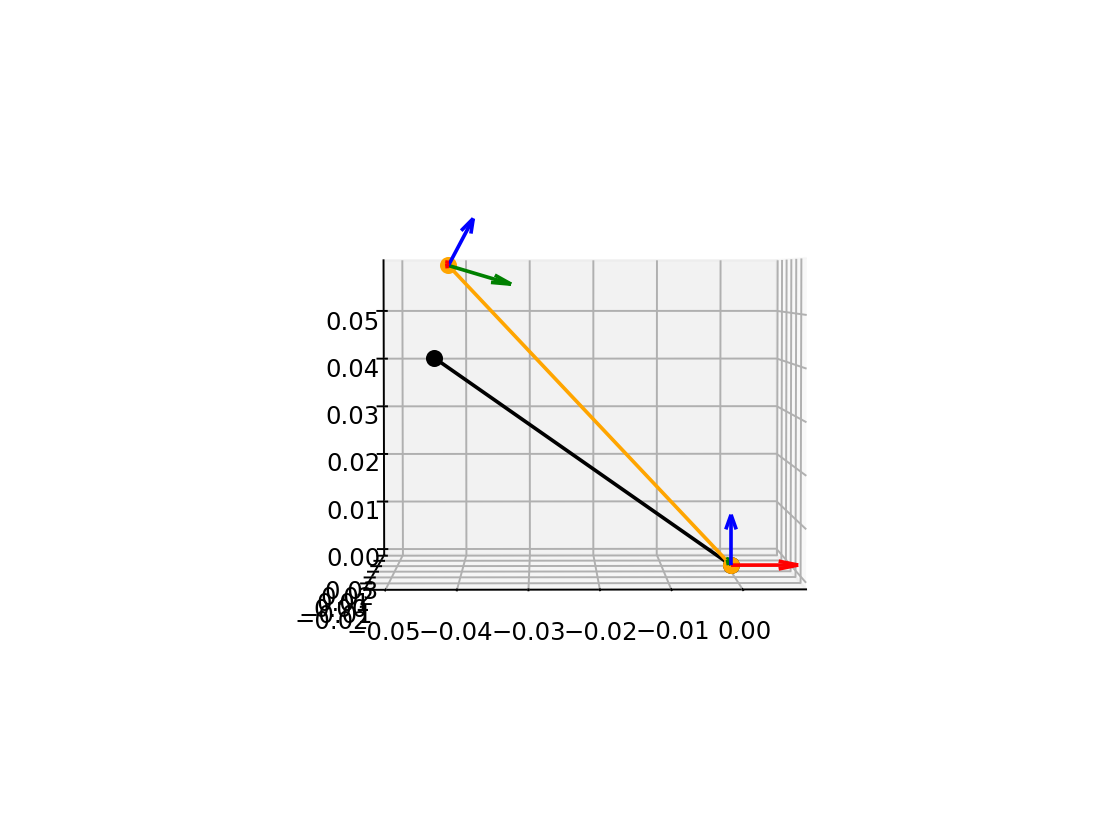

In [9]:
fig = plt.figure(1)
ax = fig.add_subplot(projection='3d')
rot_show = R.from_quat(Result_rotation).as_matrix()
ref_rot_show = R.from_quat(Reference_rotation).as_matrix()
EE_position = np.array([0,0,0])
xv = np.array(rot_show @ [1,0,0])/100
yv = np.array(rot_show @ [0,1,0])/100
zv = np.array(rot_show @ [0,0,1])/100
ax.plot3D([0,old_3_position[0]],[0,old_3_position[1]],[0,old_3_position[2]],'-o',color = 'black')
ax.plot3D([0,Result_position[0]],[0,Result_position[1]],[0,Result_position[2]],'-o',color = 'orange')
ax.quiver(*Result_position.T,*xv.T, color='red')
ax.quiver(*Result_position.T,*yv.T, color='g')
ax.quiver(*Result_position.T,*zv.T, color='b')
ax.quiver(*EE_position.T,*np.array([1,0,0]).T/100, color='red')
ax.quiver(*EE_position.T,*np.array([0,1,0]).T/100, color='g')
ax.quiver(*EE_position.T,*np.array([0,0,1]).T/100, color='b')
set_axes_equal(ax)
plt.show()